In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.color_palette('viridis', as_cmap=True)

In [2]:
df = pd.read_csv('reagent_calculator_input.csv')

In [3]:
num_cycles = 20
quench_period_dict = {0.5: str(num_cycles/0.5),
                     1: str(num_cycles/1),
                     2: str(num_cycles/2),
                     5: str(num_cycles/5),
                     20: str(num_cycles/20)}

In [4]:
df.head()

,esiv,react_volume_overshoot,img_overshoot,wash_overshoot,quencher_period,well_plate,AP,SP,Img,quencher,total_wells_req,plates_req,largest_reservoir,waste_mL
0,400.0,1.15,2.05,2.15,0.5,1500.0,20,20,40,40,120,2.0,352,1166
1,500.0,1.15,2.05,2.15,0.5,1500.0,20,20,40,40,120,2.0,434,1359
2,600.0,1.15,2.05,2.15,0.5,1500.0,20,20,40,40,120,2.0,516,1552
3,700.0,1.15,2.05,2.15,0.5,1500.0,40,40,40,80,200,3.0,598,1746
4,800.0,1.15,2.05,2.15,0.5,1500.0,40,40,60,80,220,3.0,680,1939


In [5]:
df_1700 = df.loc[df['well_plate']==1700].copy()
df_1700['num_quenches'] = [quench_period_dict[a] for a in df_1700['quencher_period']]

In [6]:
df_1700.head()

,esiv,react_volume_overshoot,img_overshoot,wash_overshoot,quencher_period,well_plate,AP,SP,Img,quencher,total_wells_req,plates_req,largest_reservoir,waste_mL,num_quenches
14,400.0,1.15,2.05,2.15,0.5,1700.0,20,20,40,40,120,2.0,352,1166,40.0
15,500.0,1.15,2.05,2.15,0.5,1700.0,20,20,40,40,120,2.0,434,1359,40.0
16,600.0,1.15,2.05,2.15,0.5,1700.0,20,20,40,40,120,2.0,516,1552,40.0
17,700.0,1.15,2.05,2.15,0.5,1700.0,20,20,40,40,120,2.0,598,1746,40.0
18,800.0,1.15,2.05,2.15,0.5,1700.0,40,40,40,80,200,3.0,680,1939,40.0


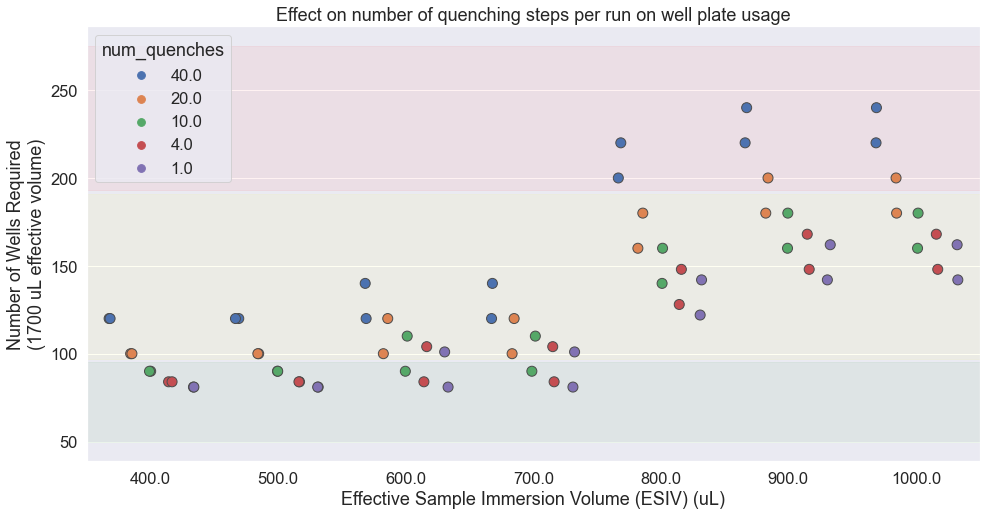

In [18]:
gif, ax = plt.subplots(figsize=(16, 8))
ax.axhspan(50, 95, color='green', alpha=0.05)
ax.axhspan(97, 191, color='yellow', alpha=0.05)
ax.axhspan(193, 275, color='red', alpha=0.05)
ax = sns.stripplot(data=df_1700, x='esiv', y='total_wells_req', hue='num_quenches',
              jitter=True, dodge=True, size=10, linewidth=1)
ax.set(xlabel='Effective Sample Immersion Volume (ESIV) (uL)',
      ylabel='Number of Wells Required\n(1700 uL effective volume)',
      title='Effect on number of quenching steps per run on well plate usage')
plt.show()

In [8]:
df_airz = pd.read_csv('airz_dispense_accuracy.csv')


In [9]:
df_airz.head()

,target_volume,water_percent_error,ethanol_percent_error,dmso_percent_error
0,600,2.333333,0.317839,2.844972
1,600,2.333333,4.688121,3.149247
2,600,2.500000,4.489472,3.909935
3,600,2.333333,5.085419,3.301384
4,600,2.166667,4.886770,2.997109


C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packag

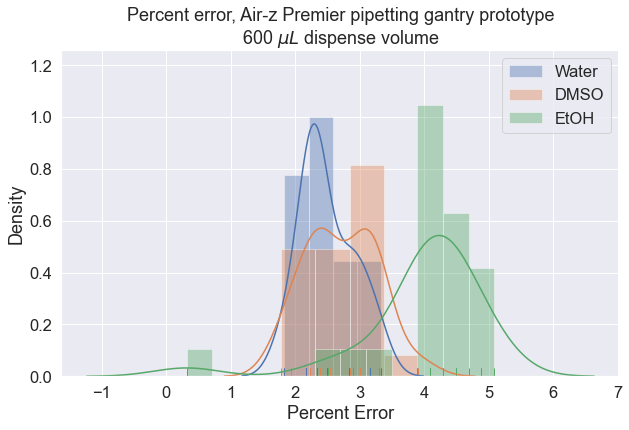

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_airz['water_percent_error'], rug=True, label='Water')
sns.distplot(df_airz['dmso_percent_error'], rug=True, label='DMSO')
sns.distplot(df_airz['ethanol_percent_error'], rug=True, label='EtOH')
ax.legend()
ax.set(xlabel='Percent Error', title=f'Percent error, Air-z Premier pipetting gantry prototype\n' \
                                        '600 $\mu L$ dispense volume')
plt.show()

In [11]:
df_airz = df_airz